In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 25.7 MB/s eta 0:00:0000:01


In [2]:
# Define dataset paths
train_dir = "/kaggle/input/license-plate-dataset/archive/images/train"
val_dir = "/kaggle/input/license-plate-dataset/archive/images/val"

# Define class names
classes = ["license_plate"]  # Add more classes if needed

# Create YAML content
data_yaml_content = f"""
train: {train_dir}
val: {val_dir}

nc: {len(classes)}
names: {str(classes).replace("'", '"')}
"""

# Save to a file
yaml_path = "/kaggle/working/data.yaml"
with open(yaml_path, "w") as f:
    f.write(data_yaml_content)

# Display the content for verification
print("Contents of data.yaml:")
!cat {yaml_path}

Contents of data.yaml:

train: /kaggle/input/license-plate-dataset/archive/images/train
val: /kaggle/input/license-plate-dataset/archive/images/val

nc: 1
names: ["license_plate"]


In [3]:
# Define dataset paths
train_dir = "/kaggle/input/license-plate-dataset/archive/images/train"
val_dir = "/kaggle/input/license-plate-dataset/archive/images/val"

# Define class names
classes = ["license_plate"]  # Add more classes if needed

# Create YAML content
data_yaml_content = f"""
train: {train_dir}
val: {val_dir}

nc: {len(classes)}  # Number of classes
names: {classes}  # Class names
"""

# Save to a file
yaml_path = "/kaggle/working/data.yaml"
with open(yaml_path, "w") as f:
    f.write(data_yaml_content)

# Display the content for verification
!cat {yaml_path}


train: /kaggle/input/license-plate-dataset/archive/images/train
val: /kaggle/input/license-plate-dataset/archive/images/val

nc: 1  # Number of classes
names: ['license_plate']  # Class names


In [4]:
# Import the necessary libraries
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # Only needed if using Colab
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained YOLOv8 model
# You can choose different sizes: n (nano), s (small), m (medium), l (large), x (extra large)
model = YOLO('yolov8n.pt')  # Load the nano model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 124MB/s]


In [5]:
results = model.train(
    data="/kaggle/working/data.yaml",
    epochs=50,  
    imgsz=640, 
    lr0= 0.0005,  
    batch=32,
    lrf=0.1,
    augment=True
)

Ultralytics 8.3.95 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 119MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/license-plate-dataset/archive/labels/train... 1525 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1526/1526 [00:10<00:00, 145.26it/s]

train: WARNING ⚠️ /kaggle/input/license-plate-dataset/archive/images/train/car-wbs-MH03AR5549_00000.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/license-plate-dataset/archive/images/train/car-wbs-MH03AR5549_00000.jpg'


train: WARNING ⚠️ Cache directory /kaggle/input/license-plate-dataset/archive/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/license-plate-dataset/archive/labels/val... 169 images, 0 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:01<00:00, 127.12it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/license-plate-dataset/archive/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.84G      1.033      2.126      1.059         39        640: 100%|██████████| 48/48 [00:16<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all        169        169      0.312       0.58      0.508      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.64G     0.9376      1.102     0.9771         38        640: 100%|██████████| 48/48 [00:15<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all        169        169      0.917      0.911      0.951      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.64G     0.9237     0.9091     0.9972         38        640: 100%|██████████| 48/48 [00:15<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        169        169      0.951      0.734      0.857      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.64G     0.9394     0.7818     0.9997         44        640: 100%|██████████| 48/48 [00:15<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        169        169      0.963      0.722      0.807      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.64G     0.7908     0.5146     0.9427         45        640: 100%|██████████| 48/48 [00:15<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        169        169      0.985      0.964      0.991      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.64G     0.7667     0.4872     0.9392         48        640: 100%|██████████| 48/48 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        169        169      0.982      0.967      0.989      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.64G     0.7352     0.4719     0.9181         46        640: 100%|██████████| 48/48 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all        169        169      0.987      0.959      0.989      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.64G     0.7498     0.4797     0.9302         42        640: 100%|██████████| 48/48 [00:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]


                   all        169        169      0.934      0.994      0.987      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.64G     0.7094     0.4545     0.9119         38        640: 100%|██████████| 48/48 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all        169        169      0.977       0.97       0.99      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.64G     0.7234     0.4552     0.9257         35        640: 100%|██████████| 48/48 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        169        169      0.988      0.971      0.992      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.64G     0.7235     0.4653     0.9308         47        640: 100%|██████████| 48/48 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        169        169       0.97      0.994      0.994      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.64G     0.7288     0.4466     0.9199         39        640: 100%|██████████| 48/48 [00:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all        169        169      0.988      0.985      0.992       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.64G     0.7146     0.4532     0.9177         34        640: 100%|██████████| 48/48 [00:15<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all        169        169      0.992      0.976      0.992      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.64G     0.7134     0.4395     0.9062         42        640: 100%|██████████| 48/48 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all        169        169      0.982      0.987      0.991      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.64G     0.7009      0.425     0.9116         35        640: 100%|██████████| 48/48 [00:15<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all        169        169       0.98      0.994      0.993       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.64G     0.6829      0.428      0.905         38        640: 100%|██████████| 48/48 [00:15<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]


                   all        169        169      0.984      0.976      0.993      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.64G      0.645     0.3854     0.8893         40        640: 100%|██████████| 48/48 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        169        169      0.993      0.988      0.993      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.64G     0.6438     0.3793     0.8878         36        640: 100%|██████████| 48/48 [00:15<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all        169        169      0.986      0.988      0.994      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.64G     0.6334     0.3723     0.8915         45        640: 100%|██████████| 48/48 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all        169        169      0.992      0.988      0.993      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.64G     0.6314     0.3736     0.8879         41        640: 100%|██████████| 48/48 [00:15<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all        169        169      0.994      0.993      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.64G     0.6248     0.3707     0.8902         38        640: 100%|██████████| 48/48 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all        169        169      0.993      0.988      0.994      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.64G     0.6228     0.3563     0.8816         33        640: 100%|██████████| 48/48 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all        169        169      0.988      0.993      0.991      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.64G     0.6093     0.3652     0.8807         37        640: 100%|██████████| 48/48 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        169        169      0.993      0.994      0.994      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.64G     0.6116     0.3515     0.8764         42        640: 100%|██████████| 48/48 [00:15<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all        169        169       0.99      0.988      0.992      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.64G     0.6104     0.3498      0.876         41        640: 100%|██████████| 48/48 [00:15<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all        169        169      0.988      0.993      0.993      0.854


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.64G     0.5383     0.2859     0.8493         21        640: 100%|██████████| 48/48 [00:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all        169        169      0.982      0.994      0.993      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.64G     0.5336     0.2863     0.8385         21        640: 100%|██████████| 48/48 [00:15<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all        169        169      0.985      0.994      0.993      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.64G     0.5274     0.2809     0.8267         21        640: 100%|██████████| 48/48 [00:15<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        169        169      0.988      0.994      0.994      0.879



50 epochs completed in 0.229 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.95 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


                   all        169        169      0.988      0.982      0.994      0.885


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 6.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


In [7]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
import torch
from PIL import Image
from IPython.display import display, Video
from ultralytics import YOLO
from collections import deque
import subprocess  # For executing ffmpeg


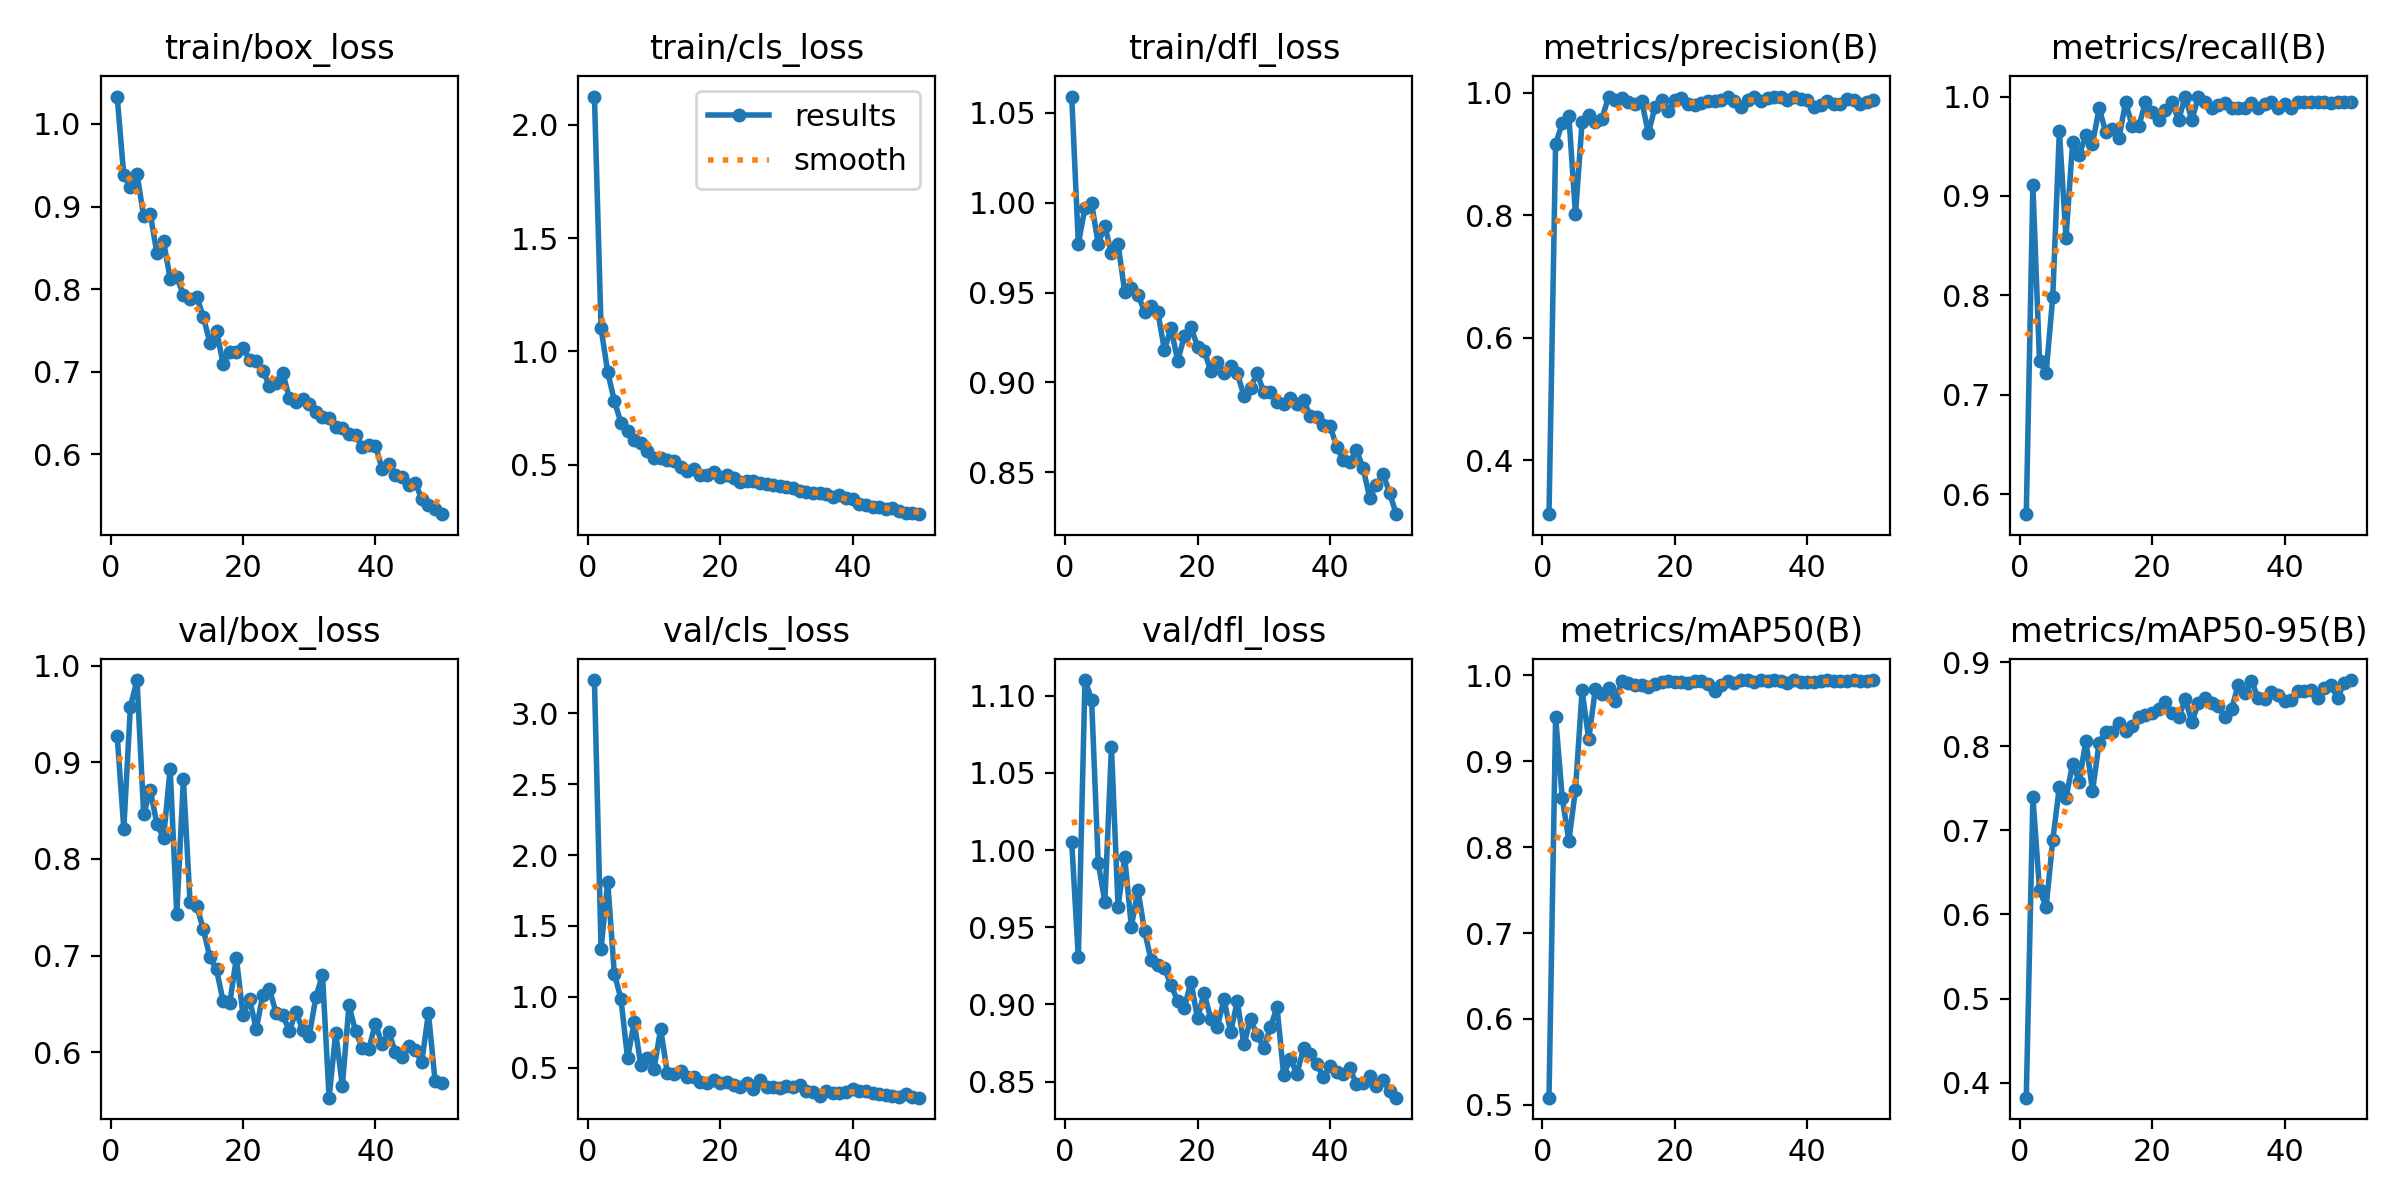

In [11]:
train_results = "/kaggle/working/runs/detect/train/results.png"

if os.path.exists(train_results):
    img = Image.open(train_results)  # Use PIL to read the image
    display(img)  # Display the image
else:
    print("Training results image not found.")